In [81]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
  
# import file with data
data = pd.read_csv("Volumetric_features.csv")
data.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


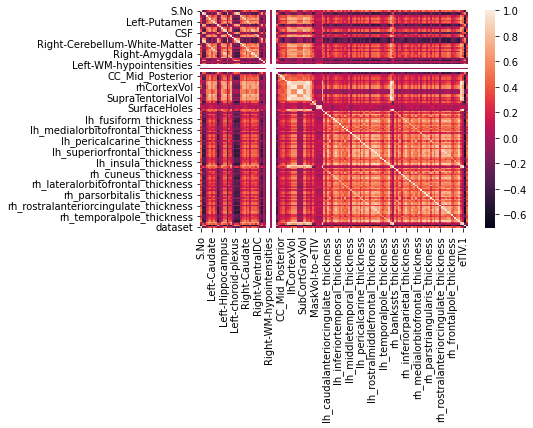

In [82]:
# plotting correlation heatmap
dataplot=sb.heatmap(data.corr())
  
# displaying heatmap
mp.show()

In [83]:
#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#sums = data.sum()
#print(sums)

#categories_drop = [column for column in sums == 0]

categories_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
categories_drop.append("Left-WM-hypointensities")
categories_drop.append("Right-WM-hypointensities")
categories_drop.append("Left-non-WM-hypointensities")
categories_drop.append("Right-non-WM-hypointensities")
categories_drop.append("S.No")
categories_drop.append("dataset")

target = data["Age"]

refinedData = data.drop(categories_drop, axis=1)
refinedData.head()

C:\Users\lubab\AppData\Local\Temp/ipykernel_28156/1327957093.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,Left-Lateral-Ventricle,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Caudate,4th-Ventricle,Left-vessel,Right-vessel,5th-Ventricle,non-WM-hypointensities,Optic-Chiasm,...,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_isthmuscingulate_thickness,lh_parahippocampal_thickness,lh_rostralanteriorcingulate_thickness,lh_temporalpole_thickness,rh_caudalanteriorcingulate_thickness,rh_rostralanteriorcingulate_thickness
0,22916.9,15196.7,55796.4,2956.4,1572.5,50.7,47.9,0.0,0.0,249.3,...,2.464,2.368,1.810,3.425,2.082,2.258,2.570,3.724,2.262,2.596
1,22953.2,15289.7,55778.6,3064.2,1650.5,42.1,47.2,0.0,0.0,253.5,...,2.419,2.215,1.817,3.479,2.028,2.245,2.513,3.619,2.176,2.525
2,23320.4,15382.1,55551.2,3231.7,1522.1,76.4,49.4,0.0,0.0,251.2,...,2.429,2.321,1.768,3.400,2.010,2.258,2.569,3.672,2.200,2.563
3,24360.0,14805.4,54041.8,3137.3,1570.3,50.1,54.9,0.0,0.0,259.4,...,2.332,2.315,1.804,3.414,1.984,2.166,2.455,3.632,2.161,2.428
4,25769.4,16331.1,54108.6,2964.4,1601.1,44.5,77.3,0.0,0.0,265.2,...,2.352,2.250,1.802,3.343,1.922,2.138,2.434,3.633,2.255,2.499


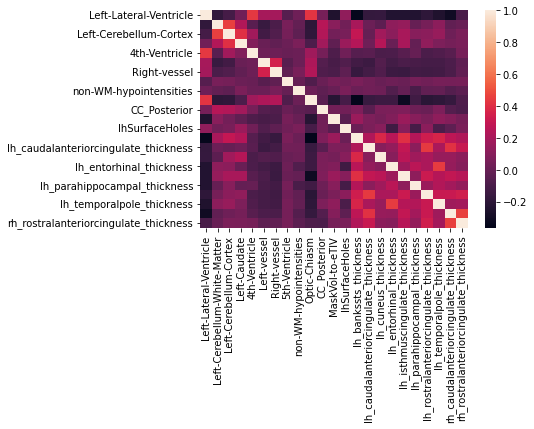

In [84]:
dataplot2=sb.heatmap(refinedData.corr())

# displaying heatmap
mp.show()

In [85]:
# https://www.aionlinecourse.com/tutorial/machine-learning/support-vector-regression

# Importing Libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

In [86]:
# https://www.aionlinecourse.com/tutorial/machine-learning/support-vector-regression

# Import train_test_split function
# from sklearn.model_selection import train_test_split
import numpy as np

# outcomes = data['Age'] # outcomes is not an array. It is a column in a dataset. So we use the NumPy np.ravel() function to convert that to an array.
# features = data.iloc[:,0:141]
# X = features
# y = np.ravel(outcomes) # converting outcomes into an array

properties = list(data.columns.values)
properties.remove('Age') # remove the outcome
# print(properties)
X = data[properties]
y = data['Age'] # y vector is the Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 80% training and 20% test
y.head()

0    85
1    85
2    86
3    87
4    89
Name: Age, dtype: int64

In [87]:
# Normalizing data using feature scaling
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y.values.reshape(-1, 1))

In [88]:
# Fitting SVR to the dataset 
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
y = np.ravel(y) # converting y into an array
regressor.fit(X, y)
# Now we assess the performance
# Predicting a new result 
y_pred = regressor.predict(X_test) 
# y_pred = sc_y.inverse_transform(y_pred)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-8.067819768146196

ValueError: x and y must be the same size

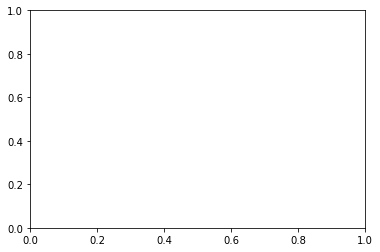

In [89]:
# Visualising the SVR results 
plt.scatter(X, y, color = 'red') 
plt.plot(X, regressor.predict(X), color = 'blue') 
plt.xlabel('Left-Thalamus') 
plt.ylabel('Age') 
plt.show()

In [ ]:
# Predicting a new result 
y_pred = regressor.predict([[6.5]]) 
y_pred = sc_y.inverse_transform(y_pred)